# Mount Google Drive

In [ ]:
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/SWQ'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive')
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['addressbook.csv', 'addressbook.gsheet', 'addressbook3.csv', 'confusion_matrix.csv', 'data', 'docs', 'evaluation_details.csv', 'mlruns', 'notebooks', 'src', 'test']


# Imports

In [ ]:
!pip install accelerate --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.6 MB/s eta 0:00:00


In [ ]:
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install packaging --quiet

In [ ]:
!pip install ninja --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install bitsandbytes --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install flash-attn --no-build-isolation --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
#!pip install torch~=2.3.0 torch_xla[tpu]~=2.3.0 -f https://storage.googleapis.com/libtpu-releases/index.html

Looking in links: https://storage.googleapis.com/libtpu-releases/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: libtpu-nightly
    Found existing installation: libtpu-nightly 0.1.dev20240403+default
    Uninstalling libtpu-nightly-0.1.dev20240403+default:
      Successfully uninstalled libtpu-nightly-0.1.dev20240403+default


In [ ]:
import warnings

import torch
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration, BitsAndBytesConfig

from PIL import Image
from IPython.display import display
import requests
import base64
import os

import pandas as pd

from tqdm import tqdm

import mlflow
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [ ]:
# Disable FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

# Load LLaVA v1.6 Mistral 7b

In [ ]:
model_id = "llava-hf/llava-v1.6-vicuna-7b-hf"

processor = LlavaNextProcessor.from_pretrained(model_id)
processor.tokenizer.padding_side = "left"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)


model = LlavaNextForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    attn_implementation="flash_attention_2",
    device_map="cuda"
)
model.generation_config.pad_token_id = model.generation_config.eos_token_id

preprocessor_config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

# Load LLaVA v1.6 34b

In [ ]:
model_id="llava-hf/llava-v1.6-34b-hf"

default_dtype = torch.get_default_dtype()
torch.set_default_dtype(torch.bfloat16)

processor = LlavaNextProcessor.from_pretrained(model_id)
processor.tokenizer.padding_side = "left"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

model = LlavaNextForConditionalGeneration.from_pretrained(
    model_id,
    low_cpu_mem_usage=True,
    quantization_config=quantization_config,
    attn_implementation="flash_attention_2",
    device_map="cuda",
    torch_dtype=torch.bfloat16
)

torch.set_default_dtype(default_dtype)

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

model-00001-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00004-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00005-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00006-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00007-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00008-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00009-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00010-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00011-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00012-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00013-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00014-of-00015.safetensors:   0%|          | 0.00/4.76G [00:00<?, ?B/s]

model-00015-of-00015.safetensors:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour


Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

# Mlflow Experiment

In [ ]:
os.environ["MLFLOW_TRACKING_TOKEN"] = ""
os.environ["MLFLOW_TRACKING_URI"] = ""

In [ ]:
mlflow.set_experiment("Evaluate Image + HTML")

<Experiment: artifact_location='not_implemented', creation_time=None, experiment_id='3', last_update_time=None, lifecycle_stage='active', name='Evaluate Image + HTML', tags={}>

In [ ]:
map = {
    f"distinct": 2,
    f"near-duplicate": 1,
    f"clone": 0,
}

In [ ]:
easy_map = {
    f"distinct": 2,
    f"near-duplicate": 0,
    f"clone": 0,
}

In [ ]:
#map = easy_map

In [ ]:
appname = "addressbook"

In [ ]:
all_states_df = pd.read_csv("data/SS.csv")

In [ ]:
all_states_df['generated_text'] = None

In [ ]:
current_app_states_df = all_states_df[all_states_df['appname'] == appname]

In [ ]:
current_app_states_df = current_app_states_df[current_app_states_df['HUMAN_CLASSIFICATION'] != 2]

In [ ]:
#current_app_states_df['HUMAN_CLASSIFICATION'] = current_app_states_df['HUMAN_CLASSIFICATION'].replace(1, 0)

<ipython-input-15-2800f9d46030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_app_states_df['HUMAN_CLASSIFICATION'] = current_app_states_df['HUMAN_CLASSIFICATION'].replace(1, 0)


In [ ]:
current_app_states_df = current_app_states_df.sample(frac=1).reset_index(drop=True)

In [ ]:
current_app_states_df[['state1', "state2", "HUMAN_CLASSIFICATION"]]

,state1,state2,HUMAN_CLASSIFICATION
0,state269,state420,1
1,state619,state634,1
2,state249,state400,1
3,state566,state709,1
4,state697,state700,1
...,...,...,...
2368,state517,state703,1
2369,state550,state706,1
2370,state523,state727,1
2371,state272,state489,1


# Prompt

In [ ]:
promptTemplates = {
    "llava-hf/llava-v1.6-34b-hf": {
        "system": "I want you to act as classifier. "
            "You will be provided with the html of two webpages and an image showing both webpages side by side. Compare the two and provide the label that classifies the comparison best."
            "Clone: This term refers to pairs of states in a web application whose underlying HTML pages are identical. "
            "In the context of web crawling and testing, if a page (pB) loaded by an interaction is identical to the previously loaded page (pA), then pB is considered a clone of pA. "
            "Near Duplicate: Refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. "
            "For example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. "
            "This similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. "
            "Distinct: Distinct pairs are those where each state in the pair demonstrates fundamentally different functionalities within the application. "
            "An example would be a login page and a user profile page, which serve completely different purposes and thus are considered distinct states in the web application model​."
            "The classification into clone, distinct, and near-duplicate categories is essential for optimizing web crawlers in automated testing, ensuring they efficiently generate concise and complete models without redundant states.",
        "prompt": "<image>\n html of left image side: '<html>' and html of right image side: '<html>'."
                  "Answer with exactly one of the following three classes: 'clone', 'near-duplicate', 'distinct'."
                  "Base you answer on the html and the definiton of the classes, the image only serves as an additional help. First name the choosen class and then explain your answer.",
        "instructionStart": "<|im_start|>user\n",
        "instructionEnd": "<|im_end|><|im_start|>assistant\n",
        "systemStart": "<|im_start|>system\n",
        "systemEnd": "<|im_end|>"
    },
    "llava-hf/llava-v1.6-mistral-7b-hf":
    {
        "prompt": "[INST] <image>\nThis is a screenshot of a website. Memorize it. [/INST] Ok, it is a login page. [INST] <image>\nHere is the other image. Describe the differences and similarities between the memorized image and this one. [/INST]",
        "instructionEnd": "[/INST]"
    },
    "llava-hf/llava-v1.6-vicuna-7b-hf":
    {
        "system": "I want you to act as classifier. "
            "You will be provided with the html of two webpages and an image showing both webpages side by side. Compare the two and provide the label that classifies the comparison best."
            "Clone: This term refers to pairs of states in a web application whose underlying HTML pages are identical. "
            "In the context of web crawling and testing, if a page (pB) loaded by an interaction is identical to the previously loaded page (pA), then pB is considered a clone of pA. "
            "Near Duplicate: Refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. "
            "For example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. "
            "This similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. "
            "Distinct: Distinct pairs are those where each state in the pair demonstrates fundamentally different functionalities within the application. "
            "An example would be a login page and a user profile page, which serve completely different purposes and thus are considered distinct states in the web application model​."
            "The classification into clone, distinct, and near-duplicate categories is essential for optimizing web crawlers in automated testing, ensuring they efficiently generate concise and complete models without redundant states.",
        "prompt": "<image>\n html of left image side: '<html>' and html of right image side: '<html>'."
                  "Answer with exactly one of the following three classes: 'clone', 'near-duplicate', 'distinct'."
                  "Base you answer on the html and the definiton of the classes, the image only serves as an additional help. First name the choosen class and then explain your answer.",
        "instructionStart": "USER:",
        "instructionEnd": "ASSISTANT: ",
        "systemStart": "",
        "systemEnd": ""
    }
}

In [ ]:
def get_label_from_string(output_str, possible_labels):
    output_str = output_str.lower()
    label_counts = {label: output_str.count(label) for label in possible_labels}

    most_common_label = max(label_counts, key=label_counts.get)

    if label_counts[most_common_label] > 0:
        return most_common_label
    else:
        return False

# Generate

In [ ]:
# Paths to resources
concat_images_folder = f"data/processed/{appname}/screenshots/concat"
html_content_folder = f"data/processed/{appname}"

batch_size = 1  # Define your batch size based on your GPU capacity
results = []
predictions = []
adjusted_true_labels = []
evaluation_details = []
non_classified_count = 0
prompt = ""
image1 = None
image_path1 = None

with mlflow.start_run():
    mlflow.set_tags({"app": appname})
    num_batches = (len(current_app_states_df) + batch_size - 1) // batch_size

    for i in tqdm(range(0, 100, batch_size), total=num_batches, desc="Processing batches"):
    # for i in tqdm(range(0, len(current_app_states_df), batch_size), total=num_batches, desc="Processing batches"):
        batch = current_app_states_df.iloc[i:i+batch_size]
        images = []
        prompts = []
        batch_true_labels = []
        batch_states = []
        for index, row in batch.iterrows():
            if pd.isna(row['generated_text']):
                image_path1 = f"{concat_images_folder}/concat_{row['state1']}_{row['state2']}.png"
                html_path1 = f"{html_content_folder}/{row['state1']}.html.body.nostyle.noscript.nometa.nolongcomment"
                html_path2 = f"{html_content_folder}/{row['state2']}.html.body.nostyle.noscript.nometa.nolongcomment"
                image1 = Image.open(image_path1)
                with open(html_path1, 'r') as file1, open(html_path2, 'r') as file2:
                    html_content1 = file1.read(3500)
                    html_content2 = file2.read(3500)
                prompt = promptTemplates[model_id]["systemStart"] + promptTemplates[model_id]["system"] + promptTemplates[model_id]["systemEnd"] + promptTemplates[model_id]["instructionStart"] + promptTemplates[model_id]["prompt"] + promptTemplates[model_id]["instructionEnd"]

                # Replace <html> placeholders with {} for string formatting
                prompt = prompt.replace("<html>", "{}")

                # Use the format method to replace the placeholders
                prompt = prompt.format(html_content1, html_content2)
                images.append(image1)
                prompts.append(prompt)
                batch_true_labels.append(row['HUMAN_CLASSIFICATION'])
                batch_states.append((row['state1'], row['state2']))

        # Process the batch
        inputs = processor(text=prompts, images=images, return_tensors="pt", padding=True).to(device)
        processor.tokenizer.padding_side = "left"
        outputs = model.generate(**inputs, max_new_tokens=50, pad_token_id=processor.tokenizer.pad_token_id)
        decoded_outputs = processor.batch_decode(outputs, skip_special_tokens=True)

        for output, (state1, state2), true_label in zip(decoded_outputs, batch_states, batch_true_labels):
            instruction_end = output.lower().find(promptTemplates[model_id]["instructionEnd"].lower()) + len(promptTemplates[model_id]["instructionEnd"])
            filtered_output = output[instruction_end:].strip().lower().replace("'", "")
            filtered_output = get_label_from_string(filtered_output, map.keys())
            print(f"{state1} vs. {state2}: {filtered_output}")
            if filtered_output in map:
              predictions.append(map[filtered_output])
              results.append(map[filtered_output])
              adjusted_true_labels.append(true_label)
              evaluation_details.append({
                          'state1': state1,
                          'state2': state2,
                          'true_label': true_label,
                          'predicted_label': map[filtered_output]
                      })
            else:
                non_classified_count += 1
                continue  # Skip this output


        # Clear memory
        del inputs, outputs, decoded_outputs
        torch.cuda.empty_cache()

    evaluation_df = pd.DataFrame(evaluation_details)
    evaluation_csv = "evaluation_details.csv"
    evaluation_df.to_csv(evaluation_csv, index=False)
    mlflow.log_artifact(evaluation_csv, artifact_path="")

    # Calculate metrics after processing all data
    accuracy = accuracy_score(adjusted_true_labels, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(adjusted_true_labels, predictions, average='weighted', zero_division=1)
    conf_matrix = confusion_matrix(adjusted_true_labels, predictions)

    # Log confusion matrix as an artifact (convert to a figure or save as CSV)
    conf_matrix_file = "confusion_matrix.csv"
    pd.DataFrame(conf_matrix).to_csv(conf_matrix_file)
    mlflow.log_artifact(conf_matrix_file, artifact_path="")

    mlflow.log_image(image1, image_path1.split("/")[-1])

    # Log params
    mlflow.log_param("model", model_id)
    mlflow.log_param("n", len(evaluation_df))

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("fscore", fscore)
    mlflow.log_metric("non_classified_inputs", non_classified_count)
    mlflow.log_text(prompt, "prompt.txt")


Processing batches:   0%|          | 0/4258 [00:21<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.99 GiB. GPU 

# Testing

Processing batches:   0%|          | 0/1187 [00:00<?, ?it/s]

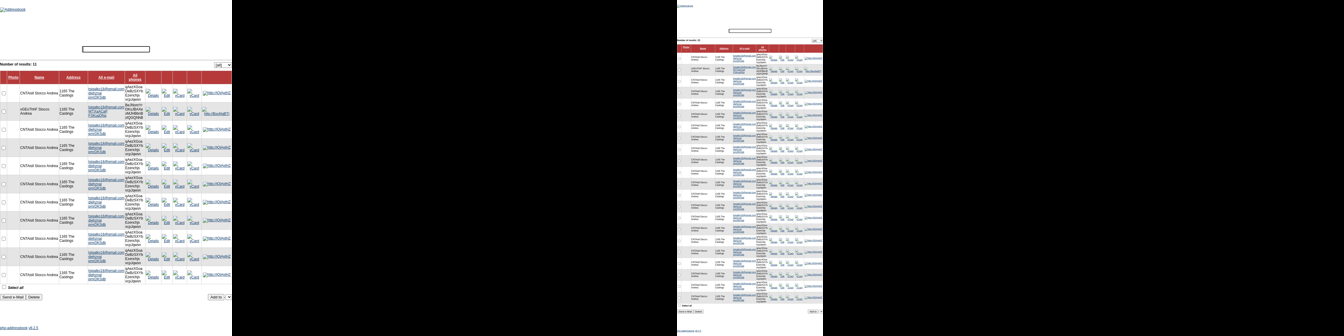

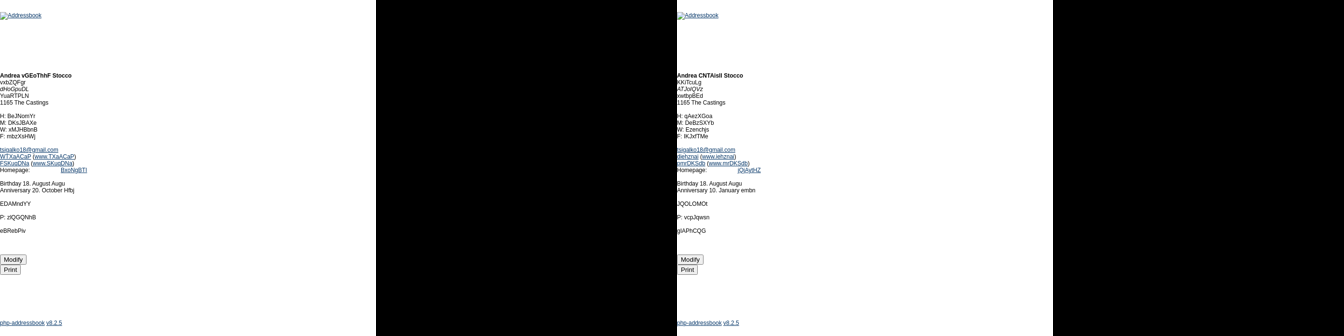

Processing batches:   0%|          | 1/1187 [09:01<178:24:57, 541.57s/it]


state269 vs. state420: to act as classifier. you will be provided with the html of two webpages and an image showing both webpages side by side. compare the two and provide the label that classifies the comparison best.clone: this term refers to pairs of states in a web application whose underlying html pages are identical. in the context of web crawling and testing, if a page (pb) loaded by an interaction is identical to the previously loaded page (pa), then pb is considered a clone of pa. near duplicate: refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. for example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. this similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. distinct: distinct pairs are t

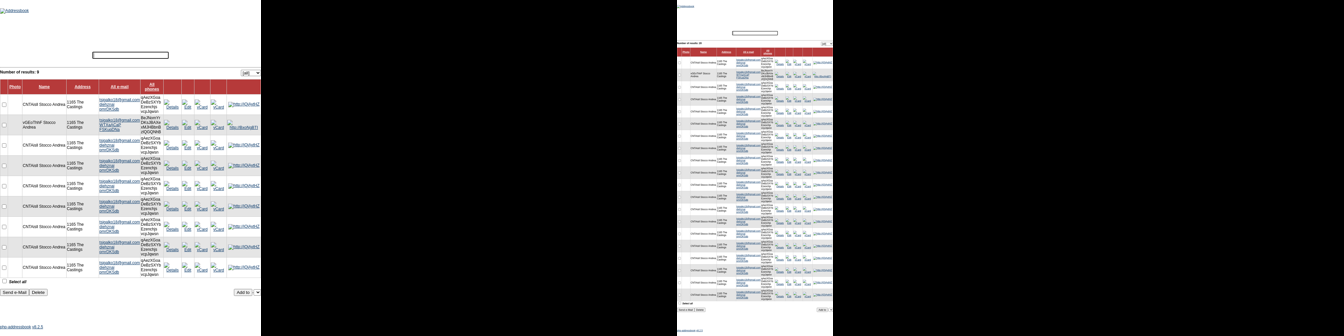

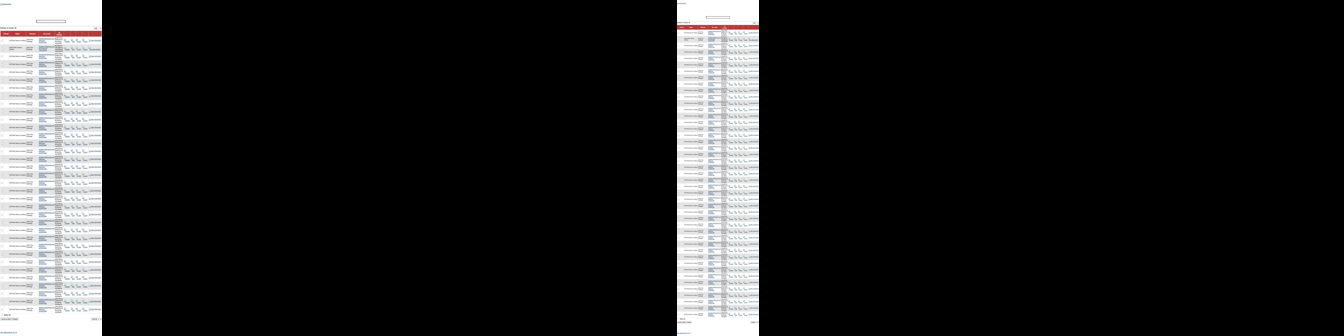

Processing batches:   0%|          | 2/1187 [14:53<141:28:27, 429.80s/it]


state249 vs. state400: to act as classifier. you will be provided with the html of two webpages and an image showing both webpages side by side. compare the two and provide the label that classifies the comparison best.clone: this term refers to pairs of states in a web application whose underlying html pages are identical. in the context of web crawling and testing, if a page (pb) loaded by an interaction is identical to the previously loaded page (pa), then pb is considered a clone of pa. near duplicate: refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. for example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. this similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. distinct: distinct pairs are t

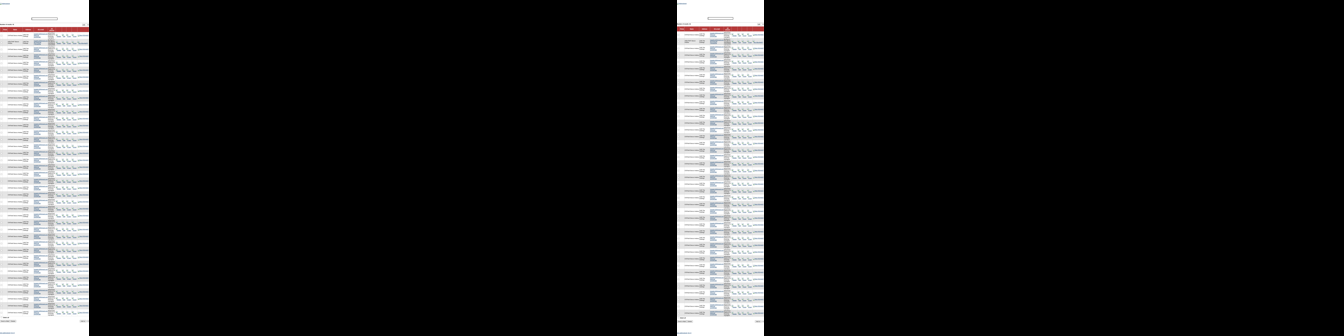

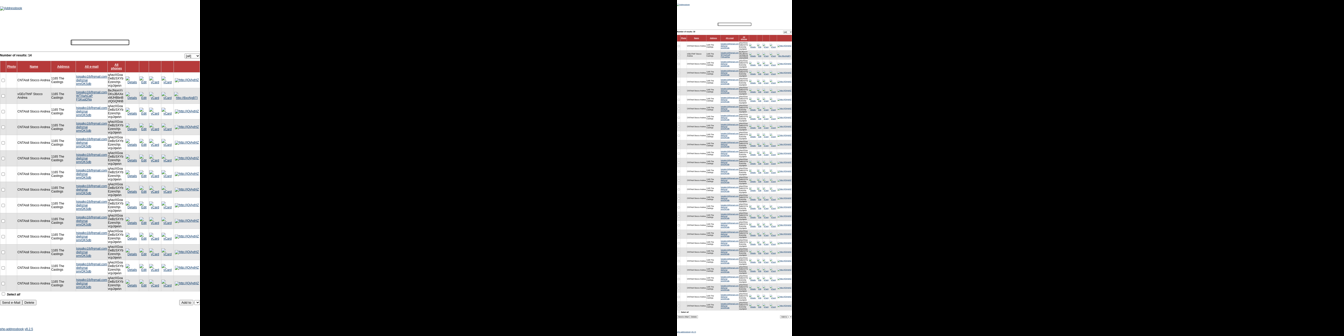

Processing batches:   0%|          | 3/1187 [21:02<132:14:06, 402.07s/it]


state697 vs. state700: to act as classifier. you will be provided with the html of two webpages and an image showing both webpages side by side. compare the two and provide the label that classifies the comparison best.clone: this term refers to pairs of states in a web application whose underlying html pages are identical. in the context of web crawling and testing, if a page (pb) loaded by an interaction is identical to the previously loaded page (pa), then pb is considered a clone of pa. near duplicate: refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. for example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. this similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. distinct: distinct pairs are t

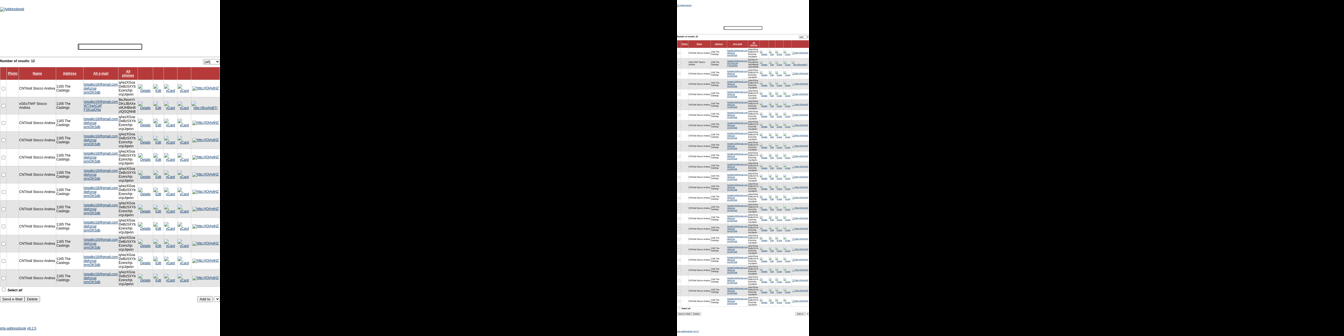

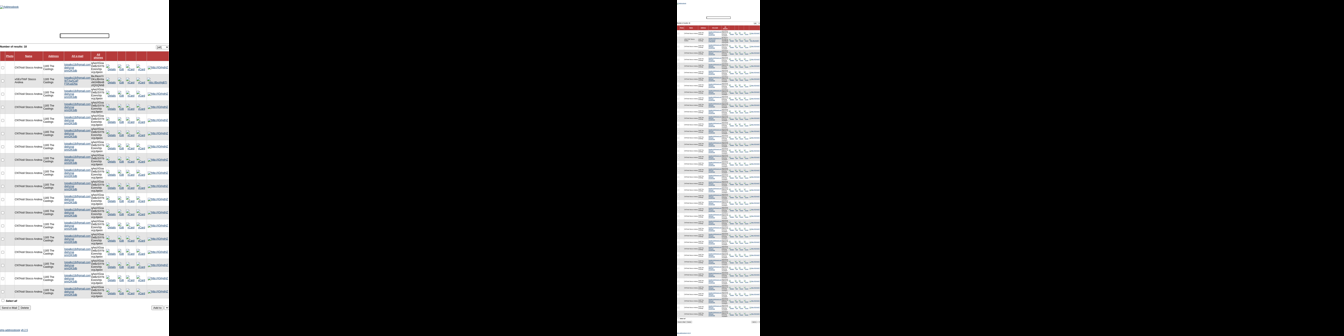

Processing batches:   0%|          | 4/1187 [25:42<116:21:03, 354.07s/it]


state308 vs. state508: to act as classifier. you will be provided with the html of two webpages and an image showing both webpages side by side. compare the two and provide the label that classifies the comparison best.clone: this term refers to pairs of states in a web application whose underlying html pages are identical. in the context of web crawling and testing, if a page (pb) loaded by an interaction is identical to the previously loaded page (pa), then pb is considered a clone of pa. near duplicate: refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. for example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. this similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. distinct: distinct pairs are t

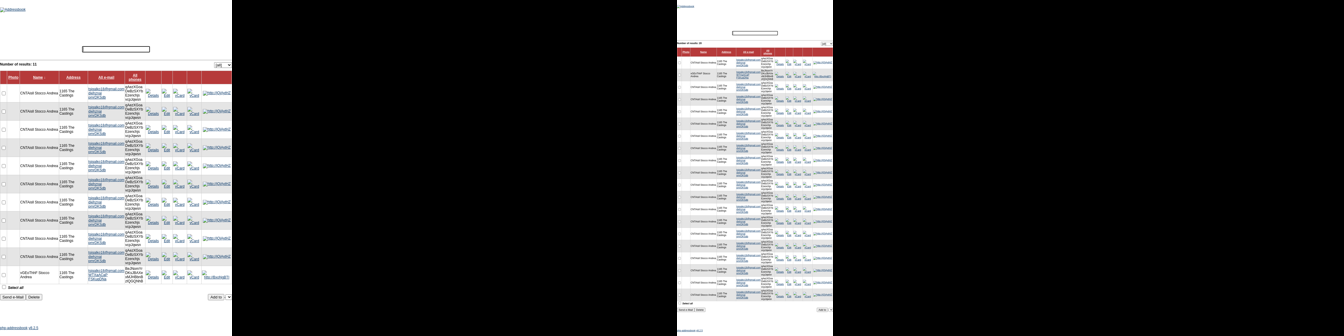

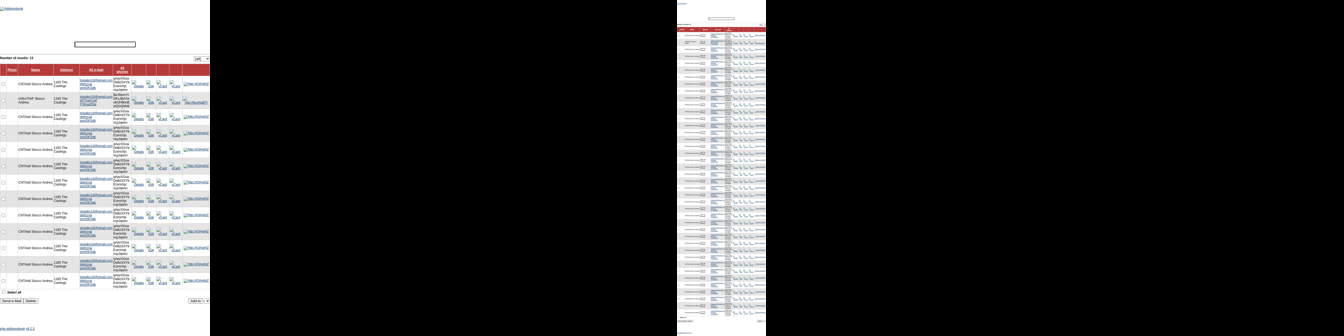

Processing batches:   0%|          | 5/1187 [31:05<122:29:41, 373.08s/it]


state272 vs. state400: to act as classifier. you will be provided with the html of two webpages and an image showing both webpages side by side. compare the two and provide the label that classifies the comparison best.clone: this term refers to pairs of states in a web application whose underlying html pages are identical. in the context of web crawling and testing, if a page (pb) loaded by an interaction is identical to the previously loaded page (pa), then pb is considered a clone of pa. near duplicate: refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. for example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. this similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. distinct: distinct pairs are t

In [ ]:
# Paths to resources
concat_images_folder = f"data/processed/{appname}/screenshots/concat"
html_content_folder = f"data/processed/{appname}"

batch_size = 2
prompt = ""
image = None
image_path = None

num_batches = (len(current_app_states_df) + batch_size - 1) // batch_size

for i in tqdm(range(0, 10, batch_size), total=num_batches, desc="Processing batches"):
# for i in tqdm(range(0, len(current_app_states_df), batch_size), total=num_batches, desc="Processing batches"):
    batch = current_app_states_df.iloc[i:i+batch_size]
    images = []
    prompts = []
    batch_true_labels = []
    batch_states = []
    for index, row in batch.iterrows():
        if pd.isna(row['generated_text']):
            image_path1 = f"{concat_images_folder}/concat_{row['state1']}_{row['state2']}.png"
            html_path1 = f"{html_content_folder}/{row['state1']}.html.body.nostyle.noscript.nometa.nolongcomment"
            html_path2 = f"{html_content_folder}/{row['state2']}.html.body.nostyle.noscript.nometa.nolongcomment"
            image1 = Image.open(image_path1)
            display(image1)
            with open(html_path1, 'r') as file1, open(html_path2, 'r') as file2:
                html_content1 = file1.read(3500)
                html_content2 = file2.read(3500)
            prompt = promptTemplates[model_id]["systemStart"] + promptTemplates[model_id]["system"] + promptTemplates[model_id]["systemEnd"] + promptTemplates[model_id]["instructionStart"] + promptTemplates[model_id]["prompt"] + promptTemplates[model_id]["instructionEnd"]

            # Replace <html> placeholders with {} for string formatting
            prompt = prompt.replace("<html>", "{}")

            # Use the format method to replace the placeholders
            prompt = prompt.format(html_content1, html_content2)

            images.append(image1)
            prompts.append(prompt)
            batch_true_labels.append(row['HUMAN_CLASSIFICATION'])
            batch_states.append((row['state1'], row['state2']))

    # Process the batch
    inputs = processor(text=prompts, images=images,return_tensors="pt", padding=True).to(device)
    processor.tokenizer.padding_side = "left"
    outputs = model.generate(**inputs, max_new_tokens=200, pad_token_id=processor.tokenizer.pad_token_id)
    decoded_outputs = processor.batch_decode(outputs, skip_special_tokens=True)

    for output, (state1, state2), true_label in zip(decoded_outputs, batch_states, batch_true_labels):
        instruction_start = output.lower().find(promptTemplates[model_id]["instructionEnd"].lower())
        if instruction_start == -1:
            # Raise an error if "ASSISTANT:" is not found
            #raise ValueError(f"The substring '{promptTemplates[model_id]['instructionEnd']}:' was not found in the output.")
            pass

        # Move the index to the start of the actual output after "ASSISTANT:"
        instruction_start += len(promptTemplates[model_id]["instructionEnd"])

        # Extract and clean the output starting from the computed index
        filtered_output = output[instruction_start:].strip().lower().replace("'", "")

        key_list = list(map.keys())
        val_list = list(map.values())

        position = val_list.index(true_label)

        print(f"\n{state1} vs. {state2}: {filtered_output}")
        print(f"\n {get_label_from_string(filtered_output, map.keys())}  (true: {key_list[position]})")


    # Clear memory
    del inputs, outputs, decoded_outputs
    torch.cuda.empty_cache()